In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import time
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
data = pd.read_csv('Parkinson.csv')


X = data.iloc[:, 1:-2]
y = data.iloc[:, -2]


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
print("\nTamaño del conjunto de entrenamiento y prueba:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento y prueba:
Entrenamiento: 1473 muestras
Prueba: 632 muestras


In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [ ]:
accuracies = {}
for name, clf in zip(names, classifiers):
    print(f"Entrenando y evaluando: {name}")
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracies[name] = score

Entrenando y evaluando: Nearest Neighbors
Entrenando y evaluando: Linear SVM
Entrenando y evaluando: RBF SVM
Entrenando y evaluando: Gaussian Process
Entrenando y evaluando: Decision Tree
Entrenando y evaluando: Random Forest
Entrenando y evaluando: Neural Net
Entrenando y evaluando: AdaBoost
Entrenando y evaluando: Naive Bayes
Entrenando y evaluando: QDA


In [ ]:
print("\nPrecisión de cada clasificador:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.2f}")


Precisión de cada clasificador:
Nearest Neighbors: 0.70
Linear SVM: 0.81
RBF SVM: 0.62
Gaussian Process: 0.82
Decision Tree: 0.87
Random Forest: 0.65
Neural Net: 0.87
AdaBoost: 0.91
Naive Bayes: 0.83
QDA: 0.82


In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_names = X.columns


In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [ ]:
print("\nImportancia de características del RandomForestClassifier:")
print(feature_importance_df)


Importancia de características del RandomForestClassifier:
                     Feature  Importance
22                     UPDRS    0.233473
24      FunctionalAssessment    0.094098
23                      MoCA    0.077376
25                    Tremor    0.073037
26                  Rigidity    0.034822
20            CholesterolHDL    0.033914
18          CholesterolTotal    0.033606
0                        Age    0.033504
9               SleepQuality    0.033466
8                DietQuality    0.032295
6         AlcoholConsumption    0.031832
21  CholesterolTriglycerides    0.031832
7           PhysicalActivity    0.031587
27              Bradykinesia    0.030687
19            CholesterolLDL    0.029882
16                SystolicBP    0.028510
17               DiastolicBP    0.027659
4                        BMI    0.026957
28       PosturalInstability    0.020262
3             EducationLevel    0.010377
2                  Ethnicity    0.007991
13                  Diabetes    0.0050

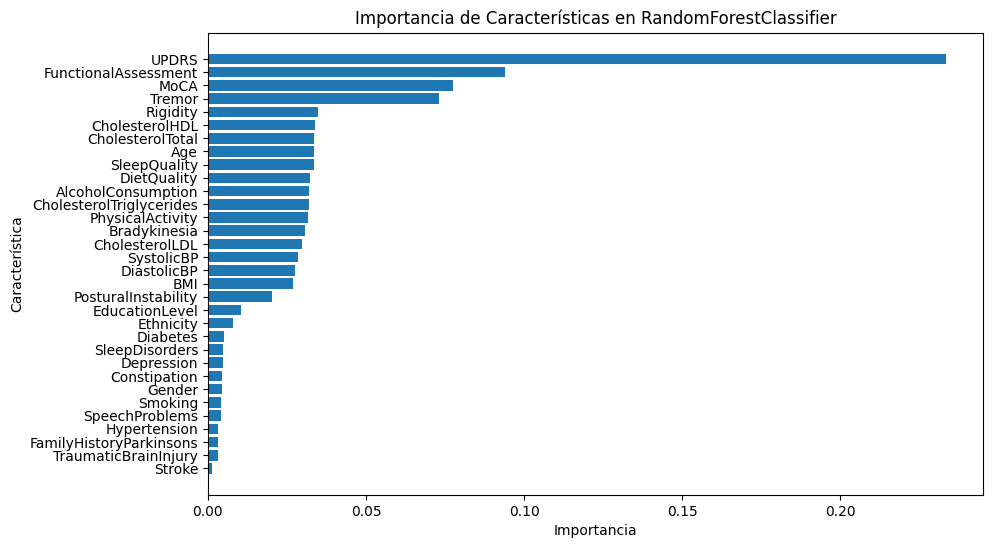

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de Características en RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()